<a href="https://colab.research.google.com/github/ihebbennaceur/Machine_learning/blob/main/double_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# model = tf.keras.models.load_model('FV.h5')
# import json
# # Get the dictionary containing each metric and the loss for each epoch
# history_dict = model.history.history
# # Save it under the form of a json file
# json.dump(history_dict, open("/content/caltechFineTuningModelHistory.json", 'w'))
# tf.keras.utils.get_file("/content/caltechFineTuningModelHistory.json",
#                         origin="lien fichier json")

# history_dict = json.load(open("/content/caltechFineTuningModelHistory.json", 'r'))

# tf.keras.utils.get_file("/content/caltechFineTuningModel.h5",
#                         origin="lien model")

# model = tf.keras.models.load_model("/content/caltechFineTuningModel.h5")

# # Visualise train / Valid Accuracy
# plt.plot(history_dict["categorical_accuracy"], c="r", label="train_accuracy")
# plt.plot(history_dict["val_categorical_accuracy"], c="b", label="test_accuracy")
# plt.legend(loc="upper left")
# plt.show()

In [ ]:
# predictions = model.predict(image)

1/1 [==============================] - 1s 897ms/step


In [ ]:
# predicted_class = np.argmax(predictions, axis=1)

In [ ]:
# # Load class labels
# with open('/content/darknet/data/9k.names', 'r') as f:
#     classes = [line.strip() for line in f.readlines()]

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# ***a rejeté***

1/1 [==============================] - 0s 63ms/step


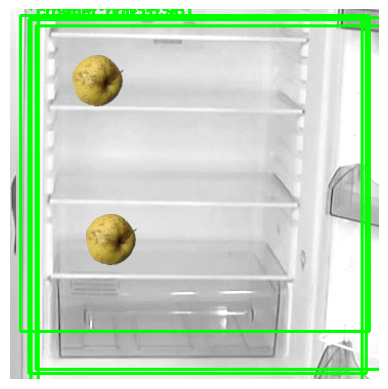

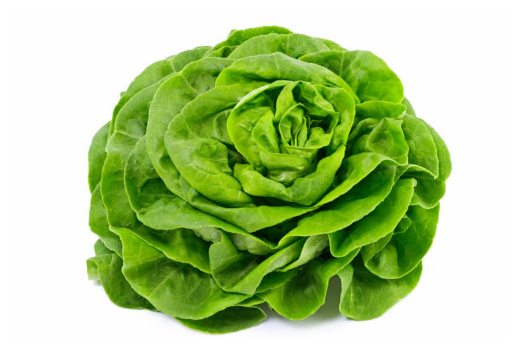

{'croquet_ball', 'refrigerator', 'balloon'}


['croquet_ball', 'réfrigérateur', 'ballon']

In [ ]:
# !pip install tensorflow tensorflow_hub numpy
# !git clone https://github.com/pjreddie/darknet
# !cd darknet
# !make
# !wget https://pjreddie.com/media/files/yolov3.weights
# !pip install googletrans==4.0.0-rc1
from googletrans import Translator

def translate_to_french(text):
    translator = Translator(service_urls=['translate.google.com'])
    translation = translator.translate(text, dest='fr')
    return translation.text

# Example usage
# english_text = "red-tomatos"
# french_translation = translate_to_french(english_text)
# print(french_translation)

import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

liens = ['/content/Fruitsflow/dataset/test/images/101.png', '/content/salade-laitue.jpg',]# '/content/legumes-plantravail.jpg','/content/IMG_20230615_141259.jpg','/content/IMG_20230615_141308.jpg','/content/IMG_20230615_141314.jpg','/content/refrigerator-with-fruits-and-vegetables[1].jpg']
fruits2=[]
for lien in liens:
    # yolo load et weights et yolov3 telechargé via net
    net = cv2.dnn.readNetFromDarknet('/content/darknet/cfg/yolov3.cfg', '/content/yolov3.weights')
    output_layers = net.getUnconnectedOutLayersNames()

    # load imaginenet
    mobilenet_model = MobileNet(weights='imagenet')
    # mobilenet_model =model2

    # les fruits legums en anglais on doit les traduire avec api google translate
    names = "Granny_Smith Carrot Broccoli Cauliflower Cabbage Spinach Lettuce Tomato Cucumber Bell pepper Eggplant Zucchini Pumpkin Sweet potato Potato Onion Garlic Celery Green beans Peas Corn Apple Banana Orange Grapefruit Strawberry Blueberry Raspberry Pineapple Mango Watermelon Kiwi Pear Peach Plum Cherry Lemon Lime Avocado Papaya Coconut"
    fruit_labels = names.split(' ')

    # image preporcess et resize
    image_path = lien
    image = cv2.imread(image_path)
    try:
      imgage = cv2.resize(image, (1400, 1000), interpolation=cv2.INTER_AREA)

    except:
      break
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # la detection
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * image.shape[1])
                center_y = int(detection[1] * image.shape[0])
                w = int(detection[2] * image.shape[1])
                h = int(detection[3] * image.shape[0])
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    #predire sur chauqe element detecter (crop)
    for i in range(len(boxes)):
        x, y, w, h = boxes[i]
        crop_img = image[y:y+h, x:x+w]
        crop_img = cv2.resize(crop_img, (224, 224))
        crop_img = preprocess_input(crop_img)
        crop_img = np.expand_dims(crop_img, axis=0)
        features = mobilenet_model.predict(crop_img)
        # predictions = decode_predictions(features, top=1, num_classes=131)[0]
        predictions = decode_predictions(features, top=1)[0]
        predicted_label = predictions[0][1]
        confidence = confidences[i]



        # les carrés
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, f"{predicted_label} ({confidence:.2f})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)



        # les noms et leurs pourcentages

        english_text = predicted_label
        french_translation = translate_to_french(english_text)
        # print(french_translation)

        # print(f"we have : {french_translation}")
        # print(f"Confidence: {confidence:.2f}\n")
        fruits2.append(english_text)




   #l'affichage des images avec les carrés apres chaque iterations sur les images
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

import pandas as pd
# if x not in pd.read_csv('/content/Biodata.csv')['compo'] :
set(fruits2)
# fr_fruits.append('banana')
# [x for x in fr_fruits if x in pd.read_csv('/content/Biodata.csv')['compo'] ]
print(set(fruits2))
[translate_to_french(x) for x in set(fruits2)]

In [ ]:

for x in fr_fruits:
  if translate_to_french(x) in ['concombre','pomme']:
    print(translate_to_french(x))


thats not fruits
thats not fruits
thats not fruits
thats not fruits
thats not fruits
thats not fruits
thats not fruits
thats not fruits
thats not fruits
thats not fruits
thats not fruits
concombre
thats not fruits
concombre


In [ ]:
import pandas as pd
# if x not in pd.read_csv('/content/Biodata.csv')['compo'] :
fr_fruits=[translate_to_french(elem) for elem in set(fruits2)]
[x for x in fr_fruits if x in pd.read_csv('/content/Biodata.csv')['compo'] ]

[]

In [ ]:
# pip install googletrans==4.0.0-rc1
from googletrans import Translator

def translate_to_french(text):
    translator = Translator(service_urls=['translate.google.com'])
    translation = translator.translate(text, dest='fr')
    return translation.text

# Example usage
english_text = "red-blue"
french_translation = translate_to_french(english_text)
print(french_translation)


rouge Bleu


In [ ]:
ss="Apple Braeburn - Apple Crimson Snow - Apple Golden 1 - Apple Golden 2 - Apple Golden 3 - Apple Granny Smith - Apple Pink Lady - Apple Red 1 - Apple Red 2 - Apple Red 3 - Apple Red Delicious - Apple Red Yellow 1 - Apple Red Yellow 2 - Apricot - Avocado ripe - Avocado - Banana Lady Finger - Banana Red - Banana - Beetroot - Blueberry - Cactus fruit - Cantaloupe 1 - Cantaloupe 2 - Carambula - Cauliflower - Cherry 1 - Cherry 2 - Cherry Rainier - Cherry Wax Black - Cherry Wax Red - Cherry Wax Yellow - Chestnut - Clementine - Cocos - Corn Husk - Corn - Cucumber Ripe 2 - Cucumber Ripe - Dates - Eggplant - Fig - Ginger Root - Granadilla - Grape Blue - Grape Pink - Grape White 2 - Grape White 3 - Grape White 4 - Grape White - Grapefruit Pink - Grapefruit White - Guava - Hazelnut - Huckleberry - Kaki - Kiwi - Kohlrabi - Kumquats - Lemon Meyer - Lemon - Limes - Lychee - Mandarine - Mango Red - Mango - Mangostan - Maracuja - Melon Piel de Sapo - Mulberry - Nectarine Flat - Nectarine - Nut Forest - Nut Pecan - Onion Red Peeled - Onion Red - Onion White - Orange - Papaya - Passion Fruit - Peach 2 - Peach Flat - Peach - Pear 2 - Pear Abate - Pear Forelle - Pear Kaiser - Pear Monster - Pear Red - Pear Stone - Pear Williams - Pear - Pepino - Pepper Green - Pepper Orange - Pepper Red - Pepper Yellow - Physalis with Husk - Physalis - Pineapple Mini - Pineapple - Pitahaya Red - Plum 2 - Plum 3 - Plum - Pomegranate - Pomelo Sweetie - Potato Red Washed - Potato Red - Potato Sweet - Potato White - Quince - Rambutan - Raspberry - Redcurrant - Salak - Strawberry Wedge - Strawberry - Tamarillo - Tangelo - Tomato 1 - Tomato 2 - Tomato 3 - Tomato 4 - Tomato Cherry Red - Tomato Heart - Tomato Maroon - Tomato Yellow - Tomato not Ripened - Walnut - Watermelon"
ss.split("-")


list

# ***Yes for this one***

1/1 [==============================] - 1s 816ms/step


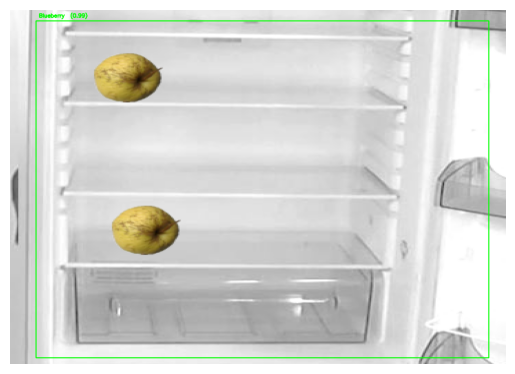

['Myrtille']
Confidence: 0.99

1/1 [==============================] - 0s 110ms/step


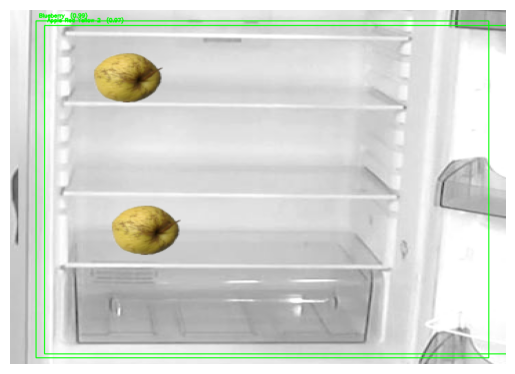

['Myrtille', 'Pomme']
Confidence: 0.97



In [ ]:
# pip install googletrans==4.0.0-rc1
from googletrans import Translator
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# fc pour translation
def translate_to_french(text):
    translator = Translator(service_urls=['translate.google.com'])
    translation = translator.translate(text, dest='fr')
    return translation.text

#liens des photos
liens = ['/content/Fruitsflow/dataset/test/images/101.png', '/content/IMG_20230615_141308.jpg', '/content/Fruitsflow/dataset/test/images/1034.png',"/content/1.jpg",'/content/salade_verte_hyyv-4n.png']

# Load MobileNet model et faire un transfer learning avec 10 epoches 0.001 learning rate
model = MobileNet(weights='imagenet', include_top=False, depth_multiplier=1)
model.load_weights("/content/TransferLearningModel_10epochs_lr0.0001_validation.h5", by_name=True)

# Load fruit labels
fruit_labels = pd.read_csv('/content/class_fruits')['class']
class_mapping = {idx: label for idx, label in enumerate(fruit_labels)}

# List to store detected fruits
fruits2 = []
ing=[]

# Loop over image paths
for lien in liens:
    net = cv2.dnn.readNetFromDarknet('/content/darknet/cfg/yolov3.cfg', '/content/yolov3.weights') #les configue des yolo et creation de network

    output_layers = net.getUnconnectedOutLayersNames() #les noms des layers
    image_path = lien
    image = cv2.imread(image_path)
    try:  #des formats d'images bug l'application
        image = cv2.resize(image, (1400, 1000), interpolation=cv2.INTER_AREA)
    except:
        break
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
# la detection des crops
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.96:

                center_x = int(detection[0] * image.shape[1])
                center_y = int(detection[1] * image.shape[0])
                w = int(detection[2] * image.shape[1])
                h = int(detection[3] * image.shape[0])
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)


#predire sur chauqe element detecter (crop) avec notre model
    for i in range(len(boxes)):
        x, y, w, h = boxes[i]
        crop_img = image[y:y+h, x:x+w]
        crop_img = cv2.resize(crop_img, (224, 224))
        crop_img = preprocess_input(crop_img)
        crop_img = np.expand_dims(crop_img, axis=0)
        features = model.predict(crop_img) #l'application du model
        predicted_label_idx = np.argmax(features[0])

        if predicted_label_idx in class_mapping:
            predicted_label = class_mapping[predicted_label_idx]
            confidence = confidences[i]

            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(image, f"{predicted_label} ({confidence:.2f})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

            fruits2.append(predicted_label)

            fr=[translate_to_french(x).split(' ')[0] for x in set(fruits2)]
            print(fr)
            print(f"Confidence: {confidence:.2f}\n")

# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()


In [ ]:
fr

['Myrtille', 'Pomme']

In [ ]:
df2=pd.DataFrame()
df2['class']=fruit_labels
df2.to_csv('class_fruits')
pd.read_csv('/content/class_fruits')[cmass]

0           Apple Braeburn 
1       Apple Crimson Snow 
2           Apple Golden 1 
3           Apple Golden 2 
4           Apple Golden 3 
               ...         
170                   Lemon
171                    Lime
172                 Avocado
173                  Papaya
174                 Coconut
Name: class, Length: 175, dtype: object

In [ ]:
# # Load class labels
# with open('/content/darknet/data/9k.names', 'r') as f:
#     classes = [line.strip() for line in f.readlines()]

In [ ]:
!git clone https://github.com/pjreddie/darknet
!cd darknet
!make
!wget https://pjreddie.com/media/files/yolov3.weights
# Load class labels
with open('/content/darknet/data/9k.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

fatal: destination path 'darknet' already exists and is not an empty directory.
make: *** No targets specified and no makefile found.  Stop.


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-06-21 08:49:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  99.9MB/s    in 2.4s    

2023-06-21 08:49:38 (99.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

/bin/bash: ./darknet: Is a directory


In [ ]:
names="Carrot Broccoli Cauliflower Cabbage Spinach Lettuce Tomato Cucumber Bell pepper Eggplant Zucchini Pumpkin Sweet potato Potato Onion Garlic Celery Green beans Peas Corn Apple Banana Orange Grapefruit Strawberry Blueberry Raspberry Pineapple Mango Watermelon Kiwi Pear Peach Plum Cherry Lemon Lime Avocado Papaya Coconut"
names.split(' ')

list

In [ ]:
!git clone https://github.com/971FLS/Fruitsflow.git

Cloning into 'Fruitsflow'...
remote: Enumerating objects: 6971, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 6971 (delta 1), reused 3 (delta 0), pack-reused 6963
Receiving objects: 100% (6971/6971), 276.67 MiB | 33.89 MiB/s, done.
Resolving deltas: 100% (1562/1562), done.
Updating files: 100% (6969/6969), done.
